In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 資料前處理

In [2]:
data = pd.read_excel('data/fund_basic_data.xlsx')
data['listed_year'] = data['成立日'].apply(lambda x: x.year)
data.head()

,基金碼,基金全稱,基金英文全稱,經理公司,成立日,進場日,上市日,清算/合併日,類型,型態,投資標的,TEJ分類,公會分類,風險收益等級,幣別,listed_year
0,0002 第一金福元,第一金福元證券投資信託基金,FSITC Fu Yuan Fund,第一金證券投資信託,1988-03-07,1988-03-07,1988-06-28,2014-06-25,開放,"國內募集,投資國內",股票,開放式一般型,開放式一般型,RR5,NTD,1988.0
1,0003 匯豐成長,匯豐成長證券投資信託基金,HSBC Taiwan Growth Fund,匯豐中華證券投資信託,1988-04-12,1988-04-12,1988-07-12,2011-11-25,開放,"國內募集,投資國內",股票,開放式一般型,開放式一般型,NaN,NTD,1988.0
2,0006 荷銀鴻福,荷銀鴻福證券投資信託基金,ABN AMRO Fortune Fund,荷銀證券投資信託,1990-10-04,1990-10-06,1990-12-20,2000-12-04,開放,"國內募集,投資國內",股票,開放式一般型,開放式一般型,NaN,NTD,1990.0
3,0007 匯豐成龍,匯豐成龍證券投資信託基金,HSBC Taiwan Dragon Fund,匯豐中華證券投資信託,1991-12-06,1992-01-11,1992-01-29,2008-01-21,開放,"國內募集,投資國內",債券,類貨幣市場,類貨幣市場,NaN,NTD,1991.0
4,0009 建弘廣福,建弘廣福證券投資信託基金,NITC Great Fortune Fund,第一金證券投資信託,1991-12-13,1991-12-13,1992-02-24,2006-08-23,開放,"國內募集,投資國內",股票+債券,平衡--一般股票型,平衡--一般股票型,NaN,NTD,1991.0


In [3]:
data.幣別.unique()

array(['NTD', 'RMB', 'USD', 'AUD', 'RAND', 'NZD', 'ECU', nan], dtype=object)

# 各年基金發售數量

In [4]:
groupby_year = data.groupby('listed_year').count()['基金碼']

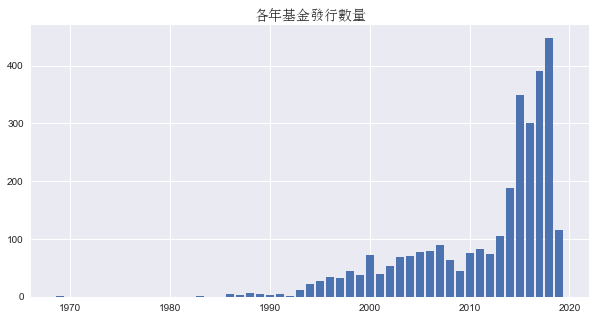

In [22]:
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=14)
plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
plt.bar(groupby_year.index, groupby_year.values)
plt.title('各年基金發行數量', FontProperties=font);

# 各公司發行數量

In [6]:
groupby_company_listed_year = pd.DataFrame(data.groupby('經理公司')['listed_year'].value_counts())
groupby_company_listed_year.columns = ['count']
groupby_company_listed_year.reset_index(inplace=True)
groupby_company_listed_year.listed_year = groupby_company_listed_year.listed_year.apply(lambda x: int(x))

In [7]:
year_range = np.arange(2019, 2004, -1)
year_range.sort()
name_list = groupby_company_listed_year.經理公司.unique()

In [8]:
result = pd.DataFrame([], columns=year_range, index=range(len(name_list)))
for i in range(len(name_list)):
    name = name_list[i]
    temp = groupby_company_listed_year[groupby_company_listed_year.經理公司 == name]
    for ix in range(len(year_range)):
        temp_year = year_range[ix]
        try:
            result.iloc[i, ix] = temp[temp.listed_year == temp_year]['count'].values[0]
        except:
            result.iloc[i, ix] = 0
            
result.index = name_list

In [9]:
result['total_count'] = result.apply(lambda x: x.sum(), axis=1)
result.sort_values('total_count', ascending=False, inplace=True)
result.drop(columns='total_count', inplace=True)

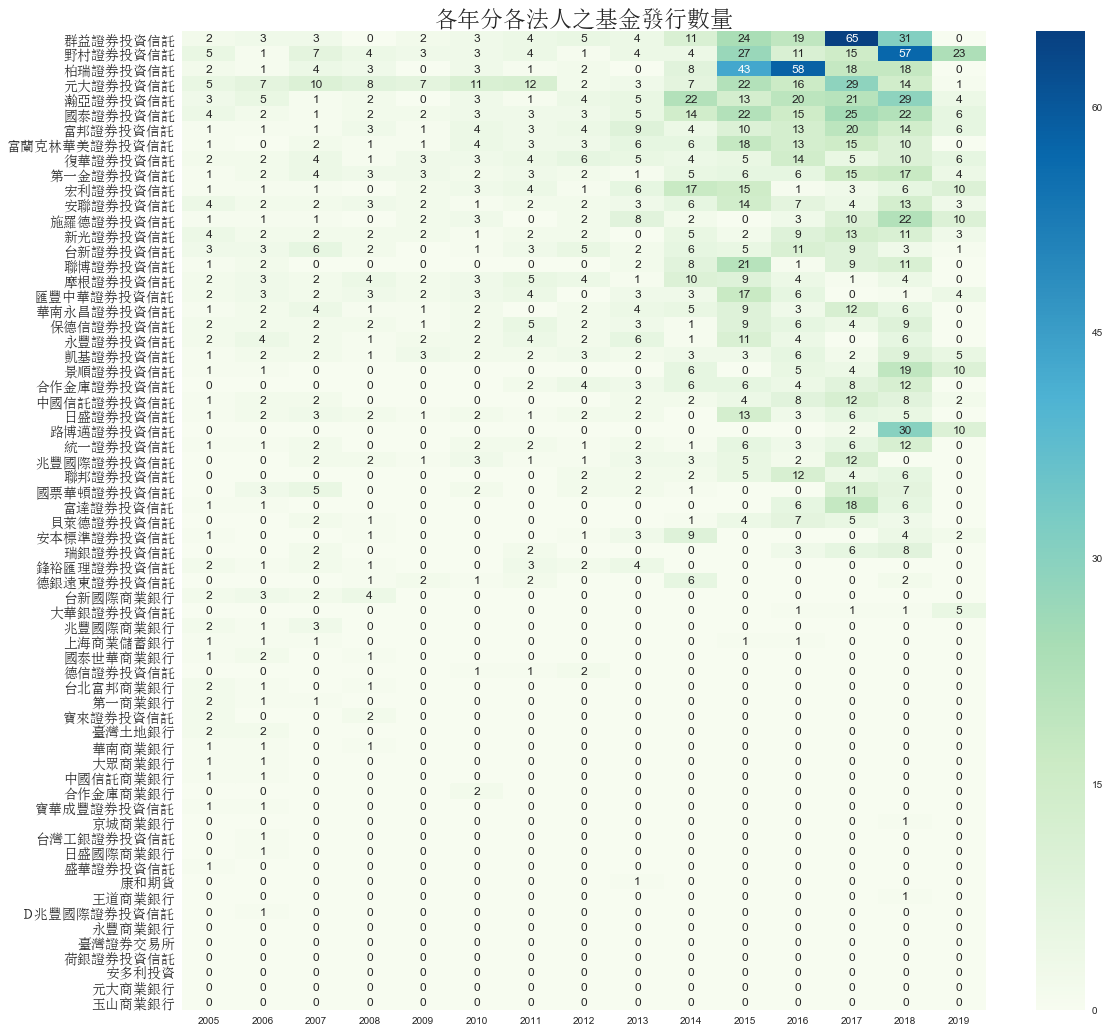

In [10]:
import seaborn as sns; sns.set()
from matplotlib import cm
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=14)

plt.figure(figsize=(18, 18))
ax = sns.heatmap(result, annot=True, fmt="d", cmap=cm.GnBu)
ax.set_yticklabels(result.index, fontproperties=font)

font_title = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=23)
plt.title('各年分各法人之基金發行數量', FontProperties=font_title);

# 各類別基金發行量

In [11]:
groupby_type_listed_year = pd.DataFrame(data.groupby('投資標的')['listed_year'].value_counts())
groupby_type_listed_year.columns = ['count']
groupby_type_listed_year.reset_index(inplace=True)
groupby_type_listed_year.listed_year = groupby_type_listed_year.listed_year.apply(lambda x: int(x))

In [12]:
year_range = np.arange(2019, 2004, -1)
year_range.sort()
name_list = groupby_type_listed_year.投資標的.unique()

In [13]:
result = pd.DataFrame([], columns=year_range, index=range(len(name_list)))
for i in range(len(name_list)):
    name = name_list[i]
    temp = groupby_type_listed_year[groupby_type_listed_year.投資標的 == name]
    for ix in range(len(year_range)):
        temp_year = year_range[ix]
        try:
            result.iloc[i, ix] = temp[temp.listed_year == temp_year]['count'].values[0]
        except:
            result.iloc[i, ix] = 0
            
result.index = name_list

In [14]:
result['total_count'] = result.apply(lambda x: x.sum(), axis=1)
result.sort_values('total_count', ascending=False, inplace=True)
result.drop(columns='total_count', inplace=True)

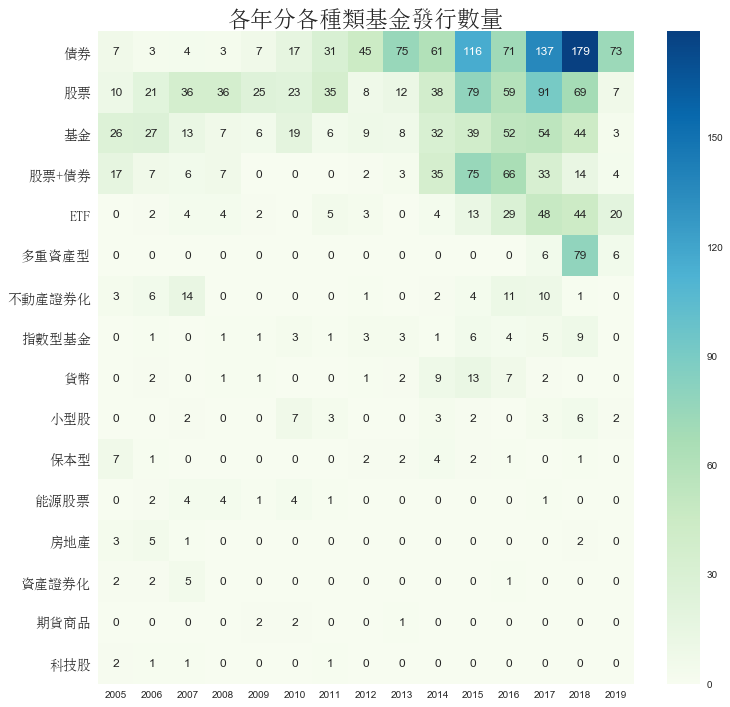

In [15]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(result, annot=True, fmt="d", cmap=cm.GnBu)
ax.set_yticklabels(result.index, fontproperties=font, rotation=360)

font_title = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=23)
plt.title('各年分各種類基金發行數量', FontProperties=font_title);

# 各類別資產AUM(台幣)

In [16]:
AUM = pd.read_csv('data/AUM/AUM.csv')
AUM = AUM[AUM.幣別 == 'NTD']

target_column = AUM.groupby('投資標的').sum().sort_values('總資產', ascending=False).index
target_column = target_column[:6]

In [17]:
AUM = AUM[AUM.年月.isna() != True]
AUM = AUM[AUM.總資產.isna() != True]
AUM = AUM[AUM.投資標的.isin(target_column)]

In [18]:
AUM_type = AUM.groupby(['投資標的', '年月']).sum()
AUM_type.reset_index(inplace=True)

date = AUM_type.年月.unique()
date.sort()
date = pd.to_datetime(date)
name = AUM_type.投資標的.unique()

In [19]:
Y = []
for i in name:
    temp = AUM_type[AUM_type.投資標的 == i]
    if len(temp.總資產) == len(date):
        Y.append(temp.總資產.values)
    else:
        temp_result = [0]*(len(date) - len(temp))
        temp_result.extend(temp.總資產.values)
        Y.append(temp_result)

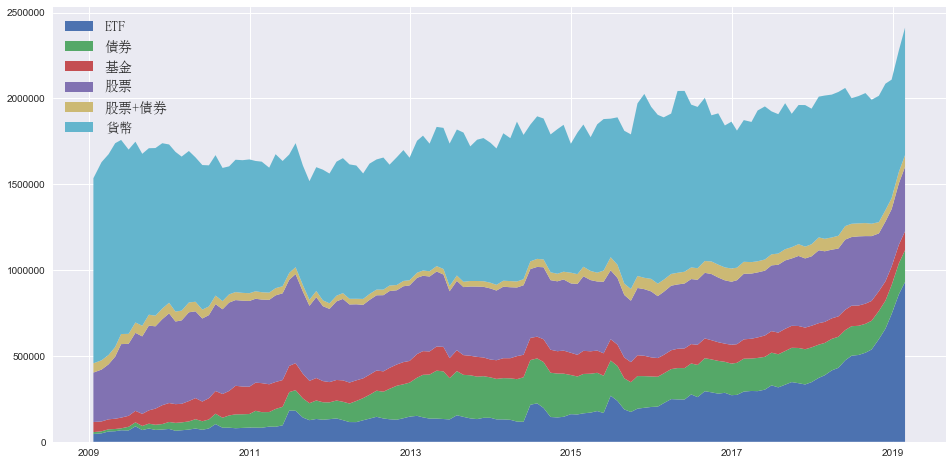

In [20]:
labels = name

plt.figure(figsize=(16, 8))
# fig, ax = plt.subplots()
plt.stackplot(date, Y, labels=labels)
plt.legend(loc='upper left', prop=font);

# 各類別資產AUM(美元)

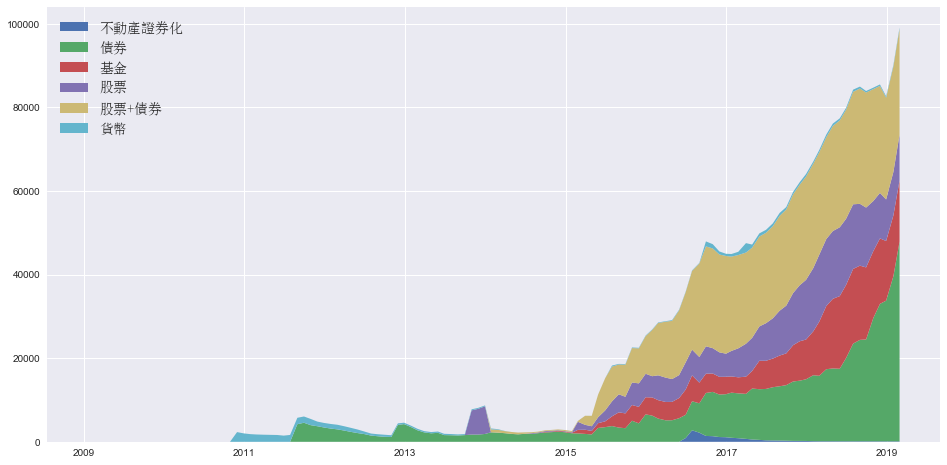

In [21]:
AUM = pd.read_csv('data/AUM/AUM.csv')
AUM = AUM[AUM.幣別 == 'USD']

target_column = AUM.groupby('投資標的').sum().sort_values('總資產', ascending=False).index
target_column = target_column[:6]

AUM = AUM[AUM.年月.isna() != True]
AUM = AUM[AUM.總資產.isna() != True]
AUM = AUM[AUM.投資標的.isin(target_column)]

AUM_type = AUM.groupby(['投資標的', '年月']).sum()
AUM_type.reset_index(inplace=True)

date = AUM_type.年月.unique()
date.sort()
date = pd.to_datetime(date)
name = AUM_type.投資標的.unique()

Y = []
for i in name:
    temp = AUM_type[AUM_type.投資標的 == i]
    if len(temp.總資產) == len(date):
        Y.append(temp.總資產.values)
    else:
        temp_result = [0]*(len(date) - len(temp))
        temp_result.extend(temp.總資產.values)
        Y.append(temp_result)
        
labels = name

plt.figure(figsize=(16, 8))
plt.stackplot(date, Y, labels=labels)
plt.legend(loc='upper left', prop=font);

# Reference

* other data source:
* https://www.sitca.org.tw/ROC/Industry/IN2203.aspx?pid=IN2221_03&fbclid=IwAR1qT5shTliqBhIiYkg7JZtOkpN_ErjbpV5hbP1zI2IEAlRDurC-AUz3Oks

---
* https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* https://matplotlib.org/examples/color/colormaps_reference.html
* https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html
* https://matplotlib.org/examples/pylab_examples/stackplot_demo.html
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html